# 2D DDW
## Pedicting Crop Type from data based in India



In [308]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rapidfuzz import process, fuzz
import json

### **Model Outline(stuff yall can follow):**
> **Warning:** DO NOT MANIPULATE THE CSV FILES DIRECTLY. Any manipulation will be done by loading the data into a variable in your code. CSV FILES SHOULD BE UNTOUCHED. However you can create and export new CSV Files based on original data.


#### Step 1 Data Preprocessing:

**CSV Files**
```bash
├── Fertilizer.csv
├── Crop_Yield.csv
```
- Use charts to visualize, summarize and understand your data. Whatever stuff you guys can think of that will help someone to understand the data better(I'll do this~Gangesh)
- Display both files using pandas and take a look at the columns. You need to find a way to combine this datasets and remove some of the unnecessary columns(ex. Production column in final dataset. Crops which are not meant for consumptions like cotton,jute etc). 
- **Note:** Some of the crop names in the soil conditions file and the Crop Yield file dont match exactly. Find a way to accurately still combine the datasets.
- After which, recall what i said about data that are not numbers, in this case states. Look up panda dummy variables.
- Normalize the data. Can use the one in problems set.
  
#### Step 2 Training and Validation:
- Follow the initial steps exactly as in cohort 9 to train your first model
- evaluate the model using an appropriate metric. Indicate all data of the trained model together with the error through your chosen error function. Visualize the trained model/training of the model with maybe types of graph
- Take steps to improve your model. Try to search online. One way is to vary the iterations and learning rate. Train a few times, then choose the model with the best accuracy.

#### Step 3 Prediction:
- Find a way to predict the crop type that gives the highest yield. 
- Recall that the above model predicts highest yield for any given crop type. So what you would do is create a function where the user types in everything except for crop, and you would go on to predict yield for every crop with the inputted variables. After which you will choose the crop with the highest yield and return it 
- In the crop yield csv you will notice a crop_type column. This refers the the type of seasonal crop they are. Ex. Rabi Crops are harvested in the spring season while it is sown in winter. Create a function where if i input a date, I can receive the corresponding crop type.


### Date  Pre-processing

In [309]:
# df_TempCropYield = pd.read_csv("Crop_Yield.csv")
# df_CropSoilConditions = pd.read_csv("Crop_Ideal_Soil_Conditions.csv")
# #add soil condition columns to start combining
# df_TempCropYield['N'] = 0
# df_TempCropYield['P'] = 0
# df_TempCropYield['K'] = 0
# df_TempCropYield['pH'] = 0

# # string1 = "Ragi( naachnnii)"
# # string2 = "Ragi"
# # str1 = "Chili"
# # str2 = "Dry chillies"
# # # Calculate the similarity score using fuzz.ratio
# # score1 = fuzz.partial_ratio(string1,string2)
# # score2 = fuzz.partial_ratio(str1,str2)
# # print(score1)
# # print(score2)
# # Using partial_ratio returned the best comparison result on sample set

# # Delete rows with cotton or jute in the 'Crop' column as those are not edible
# values_to_delete = ['Cotton(lint)', 'Jute']
# df_TempCropYield = df_TempCropYield[~df_TempCropYield['Crop'].isin(values_to_delete)]
# # Mapping dictionary for crop name conversion to assist in combining datasets
# crop_mapping = {
#     'Arhar/Tur': 'Pigeon peas(Toor Dal)',
#     'Moong(Green Gram)': 'Mung beans',
#     'Urad': 'Black Gram',
#     'Sesamum': 'Sesame Seed',
#     'Bhindi': 'Lady Finger',
#     'Cowpea(Lobia)': 'Black eyed beans(Chawli)',
#     'Guar seed': 'Cluster Beans(Gavar)'
# }
# # Replace crop names in the 'Crop' column
# df_TempCropYield['Crop'] = df_TempCropYield['Crop'].replace(crop_mapping)
# display(df_TempCropYield)

# for index, row in df_TempCropYield.iterrows():
#     # Match the crop string using fuzzywuzzy
#     match = process.extractOne(row['Crop'], df_CropSoilConditions['Crop'],scorer=fuzz.partial_ratio)
    
#     # Randomly pick one of the matches
#     matched_rows = df_CropSoilConditions[df_CropSoilConditions['Crop'] == match[0]]
#     random_matched_row = matched_rows.sample(n=1)
    
#     # Copy the values to df_TempCropYield if a match is found
#     if match[1] >= 80:  # Replace YOUR_THRESHOLD with your desired matching threshold
#         df_TempCropYield.at[index, 'N'] = random_matched_row['N'].values[0]
#         df_TempCropYield.at[index, 'P'] = random_matched_row['P'].values[0]
#         df_TempCropYield.at[index, 'K'] = random_matched_row['K'].values[0]
#         df_TempCropYield.at[index, 'pH'] = random_matched_row['pH'].values[0]
#     else:
#         # Add NaN if no match is found
#         df_TempCropYield.at[index, 'N'] = None
#         df_TempCropYield.at[index, 'P'] = None
#         df_TempCropYield.at[index, 'K'] = None
#         df_TempCropYield.at[index, 'pH'] = None
# #Drop crows for which soil data cant be found
# df_TempCropYield = df_TempCropYield.dropna(subset=['N'])
# # df_TempCropYield.to_csv('Crop_Yield_Combined_NoDummy.csv', index=False)
# df_TempCropYield.drop(['Area_in_hectares', 'Production_in_tons'], axis=1, inplace=True)
# #convert categories to dummy variables
# df_TempCropYield_NoCat = pd.get_dummies(df_TempCropYield,dtype=int)
# #move y column to last
# df_TempCropYield_NoCat["Yield_ton_per_hec"] = df_TempCropYield_NoCat.pop("Yield_ton_per_hec")
# df_TempCropYield_NoCat.to_csv('Crop_Yield_Combined.csv', index=False)


#### Functions from DDW Problem Set

In [310]:
def normalize_z(dfin, columns_means=None, columns_stds=None):
    if columns_means is None:
        columns_means = dfin.mean(axis=0)
    if columns_stds is None:
        columns_stds = dfin.std(axis=0)
    
    # Normalize each column using z-score formula
    dfout = (dfin - columns_means) / columns_stds
    
    return dfout, columns_means, columns_stds

def get_features_targets(df, feature_names, target_names):
    df_features = df[feature_names]
    df_target = df[target_names]
    df_feature_np_array = df.to_numpy()
    return df_features, df_target

def prepare_feature(df_feature):
    if isinstance(df_feature, pd.DataFrame):
        df_feature_np_array = df_feature.to_numpy()
    else:
        df_feature_np_array = df_feature
    df_feature_np_array = np.insert(df_feature_np_array,0,1,axis=1)
    return df_feature_np_array


def prepare_target(df_target):
    if isinstance(df_target, pd.DataFrame):
        df_target_np_array = df_target.to_numpy()
    else:
        df_target_np_array = df_target
    return df_target_np_array

def predict_linreg(df_feature, beta, means=None, stds=None):
    if means == None or stds == None:
        df_feature_normalized, means, stds = normalize_z(df_feature)
    else:
        df_feature_normalized,_,_ = normalize_z(df_feature,means,stds)
    df_feature_normalized = prepare_feature(df_feature_normalized)
    y_pred_array = calc_linreg(df_feature_normalized, beta)
    return y_pred_array

def calc_linreg(X, beta):
    return np.matmul(X,beta)

def compute_cost_linreg(X, y, beta):
    J = 0
    y_pred_array = calc_linreg(X, beta)
    rows,columns = y.shape
    error_np_array = np.subtract(y_pred_array,y)
    error_np_array = np.square(error_np_array)
    J = np.sum(error_np_array)
    J = (J/rows)*0.5
    return J

def gradient_descent_linreg(X, y, beta, alpha, num_iters):
    iter_count = 0
    J_storage = []
    while iter_count < iterations:
        rows,columns = y.shape
        X_transpose = np.transpose(X)
        error_np_array = np.subtract(calc_linreg(X, beta),y)
        descent_step_array = (alpha/rows)*(np.matmul(X_transpose, error_np_array))     
        beta = beta - descent_step_array
        J_storage.append(compute_cost_linreg(X, y, beta))
        iter_count+=1
    return beta, J_storage

def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    np.random.seed(random_state)
    
    # Get the indices for test data
    num_samples = len(df_feature)
    num_test_samples = int(test_size * num_samples)
    test_indices = np.random.choice(num_samples, num_test_samples, replace=False)
    # Create train and test sets for features and target
    df_feature_test = df_feature.iloc[test_indices]
    df_target_test = df_target.iloc[test_indices]
    df_feature_train = df_feature.drop(test_indices)
    df_target_train = df_target.drop(test_indices)
    return df_feature_train, df_feature_test, df_target_train, df_target_test
  
def r2_score(y, ypred):
    y_mean = np.mean(y)
    ssRes = np.sum(np.square(np.subtract(y,ypred)))
    ssTot = np.sum(np.square(y - y_mean))
    return 1 - (ssRes/ssTot)

def mean_squared_error(target, pred):
    return np.mean(np.square(np.subtract(target,pred)))

### Data Visualization

In [311]:
df_CropYieldCombined = pd.read_csv("Crop_Yield_Combined_NoDummy.csv")


### Training Phase

### Training Model 1

#### Splitting and preparing 

In [312]:
# Read the CSV file
df_CropYieldCombined = pd.read_csv("Crop_Yield_Combined.csv")

#Extract Feature Titles
feature_title_list  = [col for col in df_CropYieldCombined.columns if col != 'Yield_ton_per_hec']

# Extract the features and the targets 
df_features, df_target = get_features_targets(df_CropYieldCombined,feature_title_list,["Yield_ton_per_hec"])

# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, 100, 0.3)

# Normalize using z normalization
df_features_train_z,_,_ = normalize_z(df_features_train)

#prepare X and target to nummpy arrays 
X = prepare_feature(df_features_train_z)
target = prepare_target(df_target_train)

#### Performing Gradient Descent on Model 1

In [313]:
#define model parameters
iterations = 1500
alpha = 0.01
beta = np.zeros((108,1))

#call gradient descent function
beta, J_storage = gradient_descent_linreg(X, target, beta, alpha, iterations)
#call predict() method
pred = predict_linreg(df_features_test, beta)
target = prepare_target(df_target_test)
mse = mean_squared_error(target, pred)
print(mse)

beta_list = beta.tolist()
data = {"beta": beta_list, "J_storage": J_storage}
with open('model2.json', 'w') as file:
    json.dump(data, file)

2742.467307743449


#### Analysis and Visualization of Model 2

- Plotting Cost vs Iterations

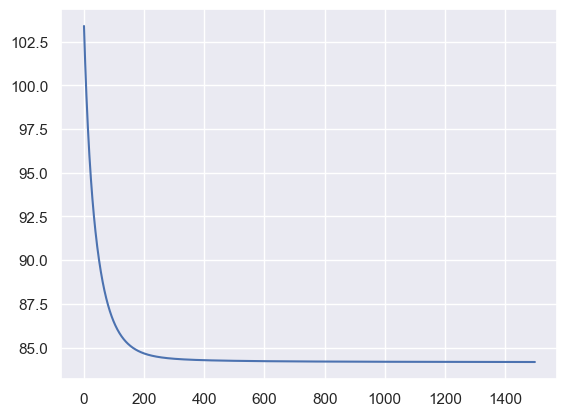

In [314]:
plt.plot(J_storage)

- Bar Graph of Beta Values for Environmental Variables 

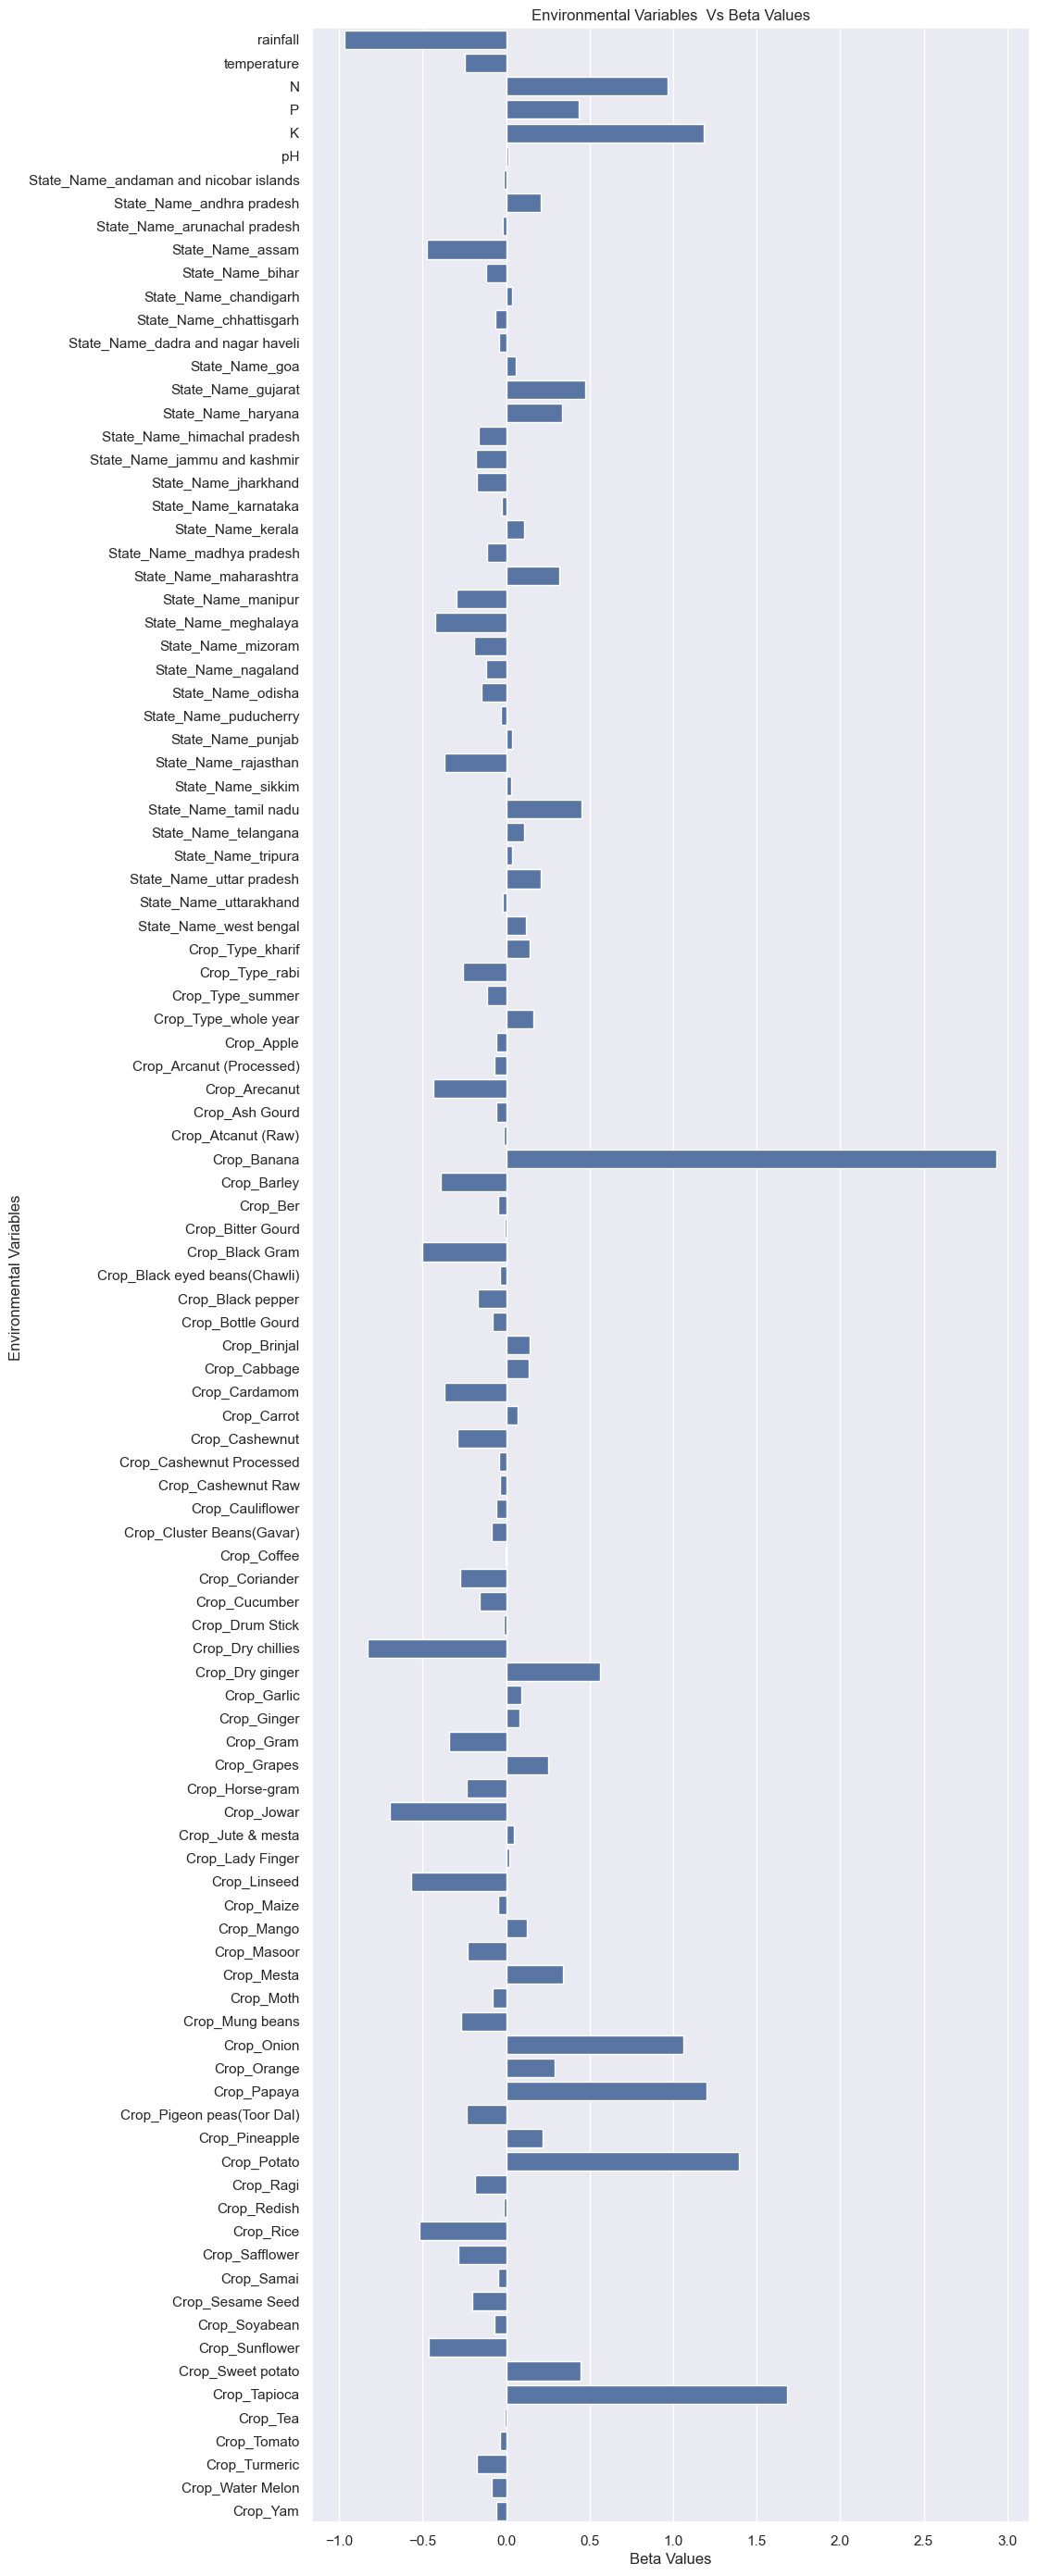

In [315]:
beta_data = beta_list[1:]
newBetaList = [item for sublist in beta_data for item in sublist]
# plt.barh(feature_title_list[39:43], newBetaList[39:43])
plt.figure(figsize=(10, 35))
sns.barplot(x=newBetaList[0:110], y=feature_title_list[0:110])
plt.xlabel('Beta Values')
plt.ylabel('Environmental Variables ')
plt.title('Environmental Variables  Vs Beta Values')
plt.show()

### Training Model 2

#### Pre-processing Data
I dropped states here as their weights seem to have minimal effect on the model in general

In [316]:
# # Read the CSV file
# df_CropYieldCombined = pd.read_csv("Crop_Yield_Combined.csv")
# df_CropYieldCombined_Model2 = df_CropYieldCombined.copy()

# #Drop columns
# df_CropYieldCombined_Model2 = df_CropYieldCombined_Model2.loc[:, ~df_CropYieldCombined_Model2.columns.str.startswith('State_Name')]
# df_CropYieldCombined_Model2.to_csv('Crop_Yield_Combined_Model2.csv', index=False)

#### Splitting and preparing 

In [317]:
# Read the CSV file
df_CropYieldCombined_Model2 = pd.read_csv("Crop_Yield_Combined_Model2.csv")

#Extract Feature Titles
feature_title_list  = [col for col in df_CropYieldCombined_Model2.columns if col != 'Yield_ton_per_hec']

# Extract the features and the targets 
df_features, df_target = get_features_targets(df_CropYieldCombined_Model2,feature_title_list,["Yield_ton_per_hec"])

# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, 100, 0.3)

# Normalize using z normalization
df_features_train_z,_,_ = normalize_z(df_features_train)

#prepare X and target to nummpy arrays 
X = prepare_feature(df_features_train_z)
target = prepare_target(df_target_train)
print(X.shape)

(82688, 75)


#### Performing Gradient Descent on Model 2

In [318]:
#define model parameters
iterations = 1500
alpha = 0.01
beta = np.zeros((75,1))

#call gradient descent function
beta, J_storage = gradient_descent_linreg(X, target, beta, alpha, iterations)
#call predict() method
pred = predict_linreg(df_features_test, beta)
target = prepare_target(df_target_test)
mse = mean_squared_error(target, pred)
print(mse)

beta_list = beta.tolist()
data = {"beta": beta_list, "J_storage": J_storage}
with open('model1.json', 'w') as file:
    json.dump(data, file)

2743.955909077861


#### Analysis and Visualization of Model 2

- Plotting Cost vs Iterations

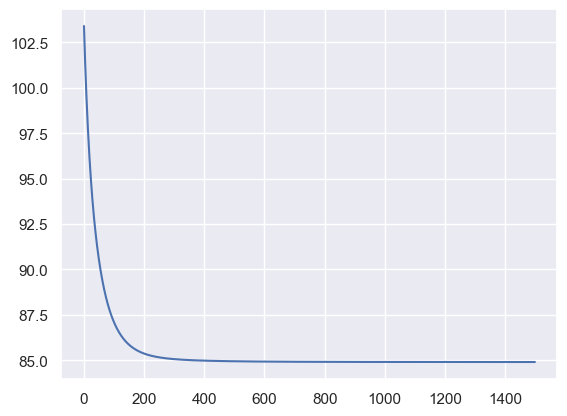

In [319]:
plt.plot(J_storage)

- Bar Graph of Beta Values for Environmental Variables 

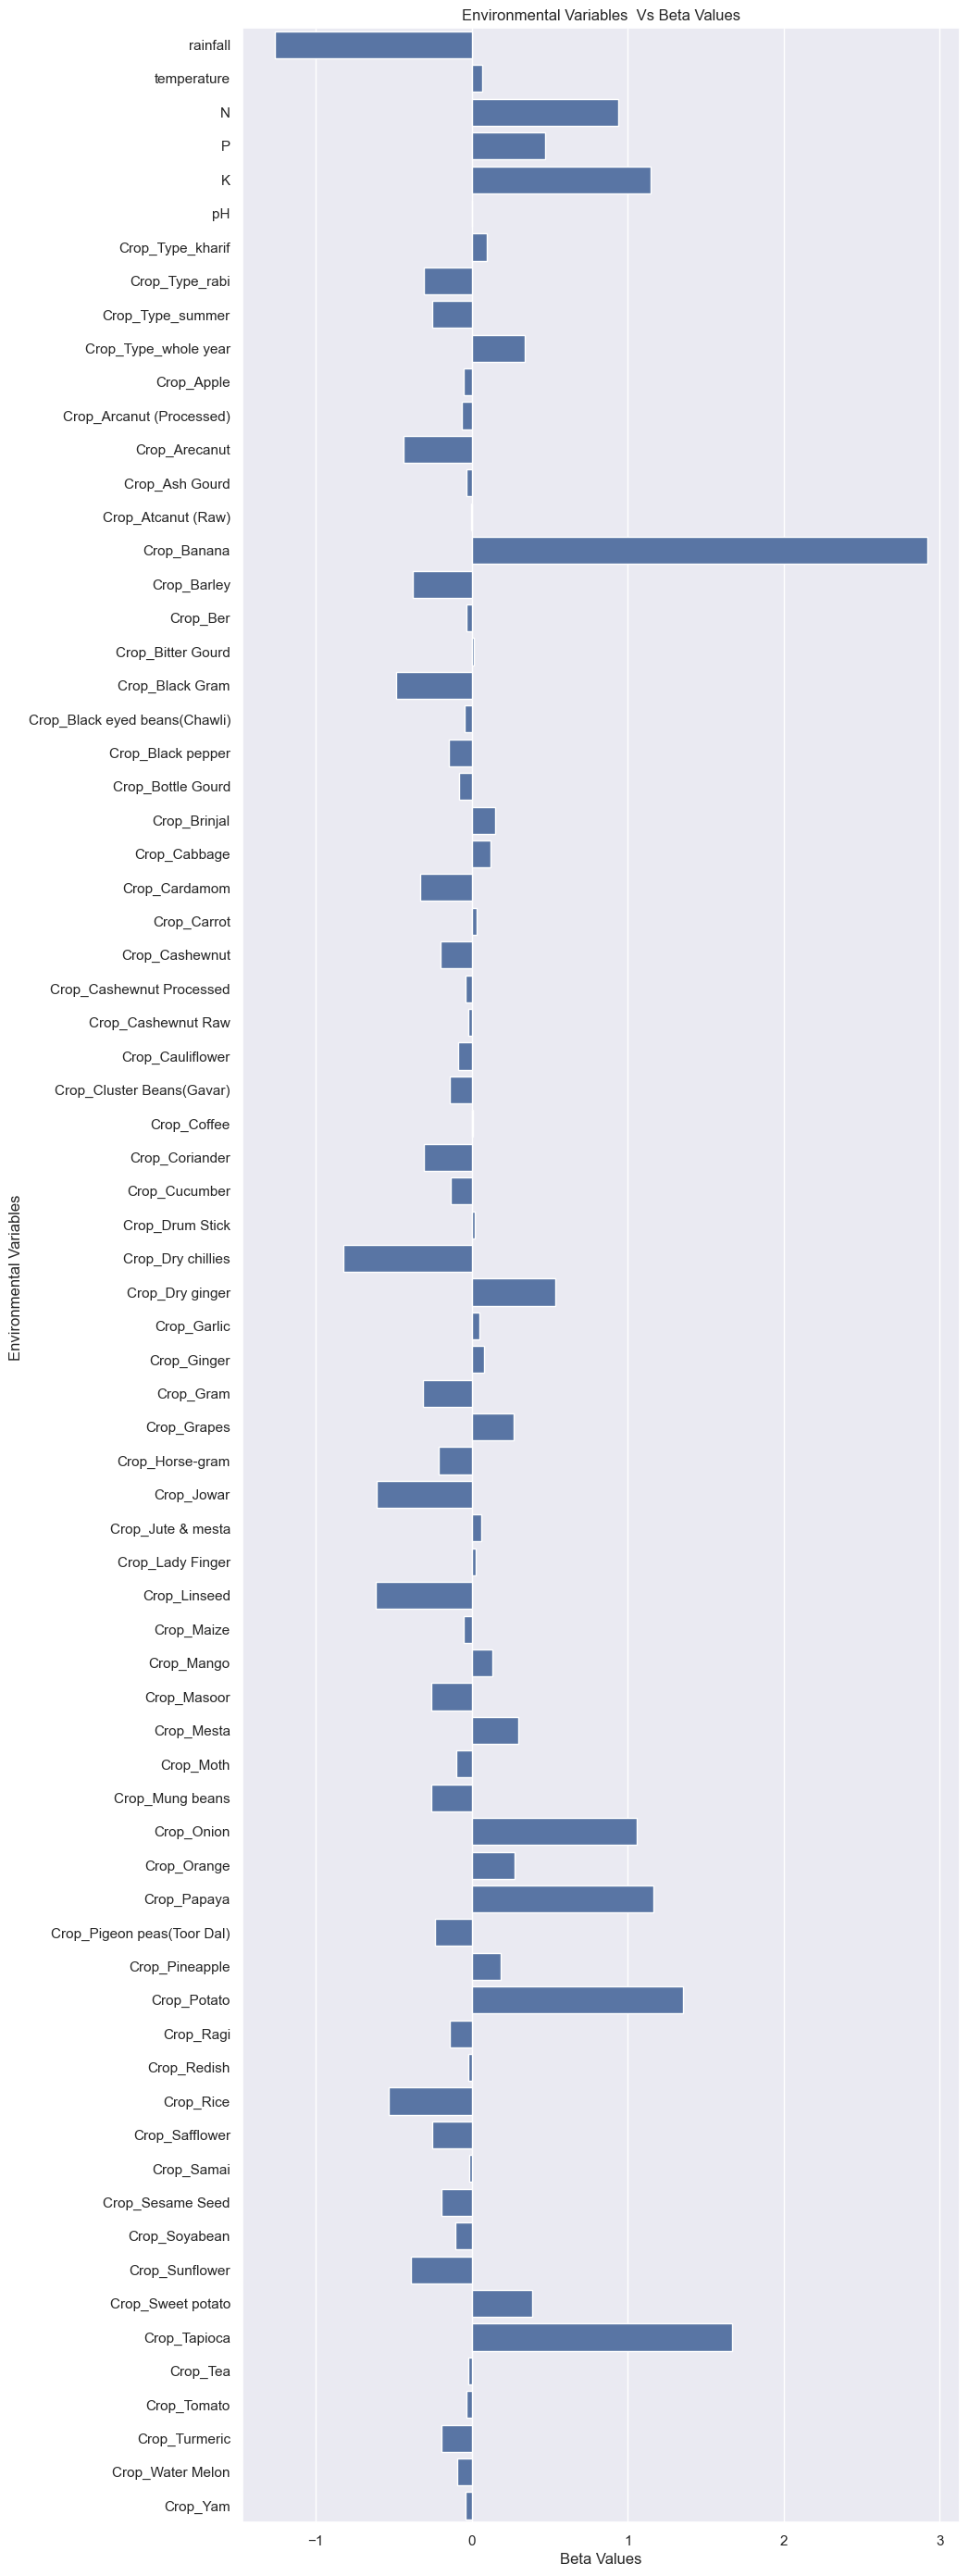

In [320]:
beta_data = beta_list[1:]
newBetaList = [item for sublist in beta_data for item in sublist]
# plt.barh(feature_title_list[39:43], newBetaList[39:43])
plt.figure(figsize=(10, 35))
sns.barplot(x=newBetaList[0:110], y=feature_title_list[0:110])
plt.xlabel('Beta Values')
plt.ylabel('Environmental Variables ')
plt.title('Environmental Variables  Vs Beta Values')
plt.show()

### Training Model 3

#### Pre-processing Data
I'm gonna try to insert similar number of crops

In [321]:
# Read the CSV file
df_CropYieldCombined = pd.read_csv("Crop_Yield_Combined_NoDummy.csv")
df_CropYieldCombined_Model3 = df_CropYieldCombined.copy()
crop_counts = df_CropYieldCombined_Model3['Crop'].value_counts()

# plt.figure(figsize=(10, 30))  # Adjust the figure size if needed
# crop_counts.plot(kind='barh')

# # Customize the plot
# plt.title('Crop Counts')
# plt.xlabel('Crop')
# plt.ylabel('Count')  # Rotate x-axis labels for better readability

# # Show the plot
# plt.show()

crops_to_drop = crop_counts[crop_counts < 2137].index

df_CropYieldCombined_Model3 = df_CropYieldCombined_Model3[df_CropYieldCombined_Model3["Crop"].isin(crops_to_drop) == False]
display(df_CropYieldCombined_Model3)
# Define a function to sample rows within each group
def sample_rows(group):
    if len(group) >= 2137:
        return group.sample(2137)
    else:
        return group
# Use groupby and apply the function to sample rows for each group
df_CropYieldCombined_Model3 = df_CropYieldCombined_Model3.groupby("Crop", group_keys=False, sort=False).apply(sample_rows)
crop_counts = df_CropYieldCombined_Model3['Crop'].value_counts()
print(crop_counts)

df_CropYieldCombined_Model3.drop(['Area_in_hectares', 'Production_in_tons'], axis=1, inplace=True)
#convert categories to dummy variables
df_CropYieldCombined_Model3_NoCat = pd.get_dummies(df_CropYieldCombined_Model3,dtype=int)
#move y column to last
df_CropYieldCombined_Model3_NoCat["Yield_ton_per_hec"] = df_CropYieldCombined_Model3_NoCat.pop("Yield_ton_per_hec")
df_CropYieldCombined_Model3_NoCat.to_csv('Crop_Yield_Combined_Model3.csv', index=False)



,State_Name,Crop_Type,Crop,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec,N,P,K,pH
0,andhra pradesh,kharif,Pigeon peas(Toor Dal),654.34,29.266667,21400.0,2600.0,0.121495,20.0,60.0,20.0,5.48
1,andhra pradesh,kharif,Dry chillies,654.34,29.266667,3700.0,7100.0,1.918919,120.0,20.0,80.0,6.38
2,andhra pradesh,kharif,Horse-gram,654.34,29.266667,3300.0,1000.0,0.303030,20.0,60.0,20.0,5.98
3,andhra pradesh,kharif,Jowar,654.34,29.266667,10100.0,10200.0,1.009901,80.0,40.0,40.0,5.54
4,andhra pradesh,kharif,Maize,654.34,29.266667,2800.0,4900.0,1.750000,80.0,40.0,20.0,5.58
...,...,...,...,...,...,...,...,...,...,...,...,...
118120,west bengal,rabi,Black Gram,152.54,22.280000,531.0,267.0,0.502825,40.0,60.0,20.0,5.04
118121,west bengal,summer,Maize,182.50,29.200000,258.0,391.0,1.515504,80.0,40.0,20.0,5.60
118122,west bengal,summer,Rice,182.50,29.200000,105.0,281.0,2.676190,80.0,40.0,40.0,5.58
118123,west bengal,rabi,Rice,152.54,22.280000,152676.0,261435.0,1.712352,80.0,40.0,40.0,5.50


Crop
Pigeon peas(Toor Dal)    2137
Dry chillies             2137
Garlic                   2137
Coriander                2137
Banana                   2137
Barley                   2137
Dry ginger               2137
Turmeric                 2137
Sweet potato             2137
Potato                   2137
Onion                    2137
Linseed                  2137
Soyabean                 2137
Black Gram               2137
Sesame Seed              2137
Gram                     2137
Sunflower                2137
Rice                     2137
Ragi                     2137
Mung beans               2137
Maize                    2137
Jowar                    2137
Horse-gram               2137
Masoor                   2137
Name: count, dtype: int64


#### Splitting and preparing 

In [322]:
# Read the CSV file
df_CropYieldCombined_Model3 = pd.read_csv("Crop_Yield_Combined_Model3.csv")
#Extract Feature Titles
feature_title_list  = [col for col in df_CropYieldCombined_Model3.columns if col != 'Yield_ton_per_hec']

# Extract the features and the targets 
df_features, df_target = get_features_targets(df_CropYieldCombined_Model3,feature_title_list,["Yield_ton_per_hec"])

# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, 100, 0.3)

# Normalize using z normalization
df_features_train_z,_,_ = normalize_z(df_features_train)

#prepare X and target to nummpy arrays 
X = prepare_feature(df_features_train_z)
target = prepare_target(df_target_train)
print(X.shape)

(35902, 68)


#### Performing Gradient Descent on Model 3

In [323]:
#define model parameters
iterations = 1500
alpha = 0.01
beta = np.zeros((68,1))

#call gradient descent function
beta, J_storage = gradient_descent_linreg(X, target, beta, alpha, iterations)
#call predict() method
pred = predict_linreg(df_features_test, beta)
target = prepare_target(df_target_test)
mse = mean_squared_error(target, pred)
print(mse)

beta_list = beta.tolist()
data = {"beta": beta_list, "J_storage": J_storage}
with open('model3.json', 'w') as file:
    json.dump(data, file)

20.207935187525923


#### Analysis and Visualization of Model 3

- Plotting Cost vs Iterations

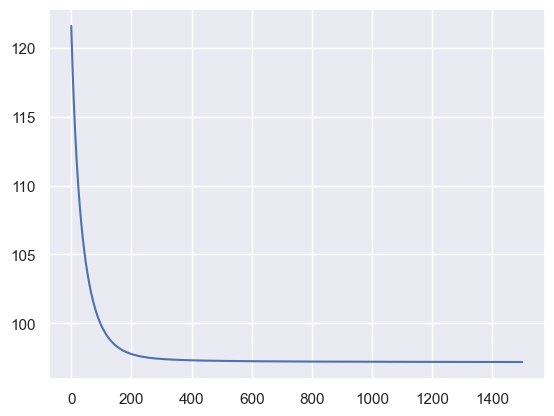

In [324]:
plt.plot(J_storage)

- Bar Graph of Beta Values for Environmental Variables 

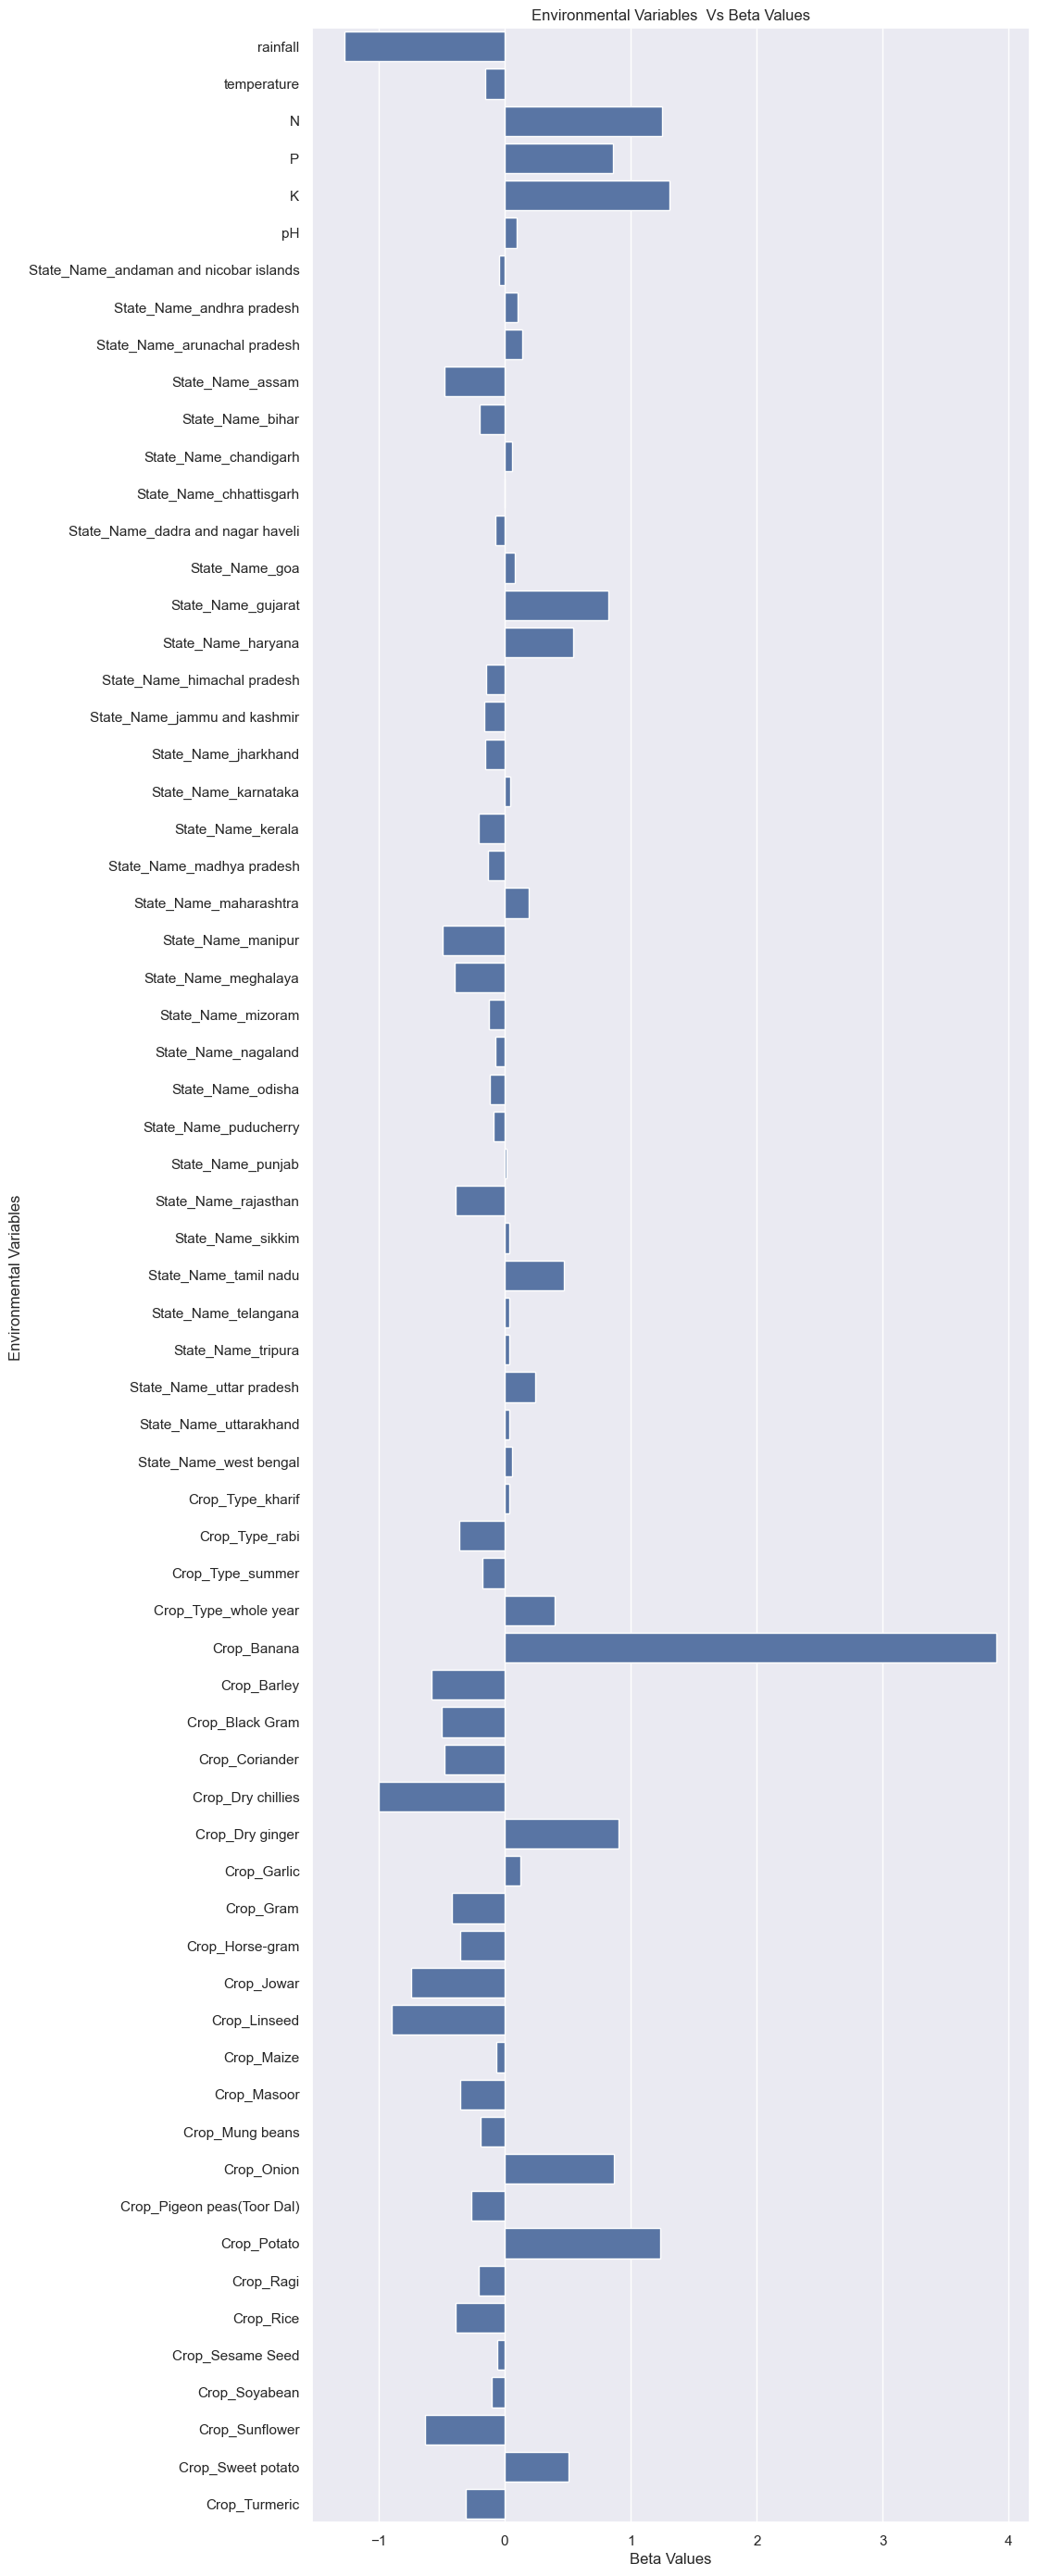

In [325]:
beta_data = beta_list[1:]
newBetaList = [item for sublist in beta_data for item in sublist]
# plt.barh(feature_title_list[39:43], newBetaList[39:43])
plt.figure(figsize=(10, 35))
sns.barplot(x=newBetaList[0:110], y=feature_title_list[0:110])
plt.xlabel('Beta Values')
plt.ylabel('Environmental Variables ')
plt.title('Environmental Variables  Vs Beta Values')
plt.show()